# EDA (Exploratory Data Analysis)

## 1. Importación de librerías

In [ ]:
## Importación de librerías
## ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ast
import cv2
from PIL import Image, ImageOps

## 2. Carga de datos

In [ ]:
## Directorios a utilizar
## ==============================================================================

COVID_path           = 'images_improved/COVID/'
Lung_Opacity_path    = 'images_improved/Lung_Opacity/'
Normal_path          = 'images_improved/Normal/'
Viral_Pneumonia_path = 'images_improved/Viral Pneumonia/'

In [ ]:
## Carga de imágenes
## ==============================================================================

COVID           = sorted(os.listdir(COVID_path))
Lung_Opacity    = sorted(os.listdir(Lung_Opacity_path))
Normal          = sorted(os.listdir(Normal_path))
Viral_Pneumonia = sorted(os.listdir(Viral_Pneumonia_path))

## 3. EDA (Exploratory Data Analysis)

In [ ]:
## Tamaño del dataset 
## ==============================================================================

print(f'Imágens COVID: {len(COVID)}')
print(f'Imágens Lung Opacity: {len(Lung_Opacity)}')
print(f'Imágens Normal: {len(Normal)}')
print(f'Imágens Viral Pneumonia: {len(Viral_Pneumonia)}')

Imágens COVID: 3378
Imágens Lung Opacity: 5761
Imágens Normal: 9908
Imágens Viral Pneumonia: 1335


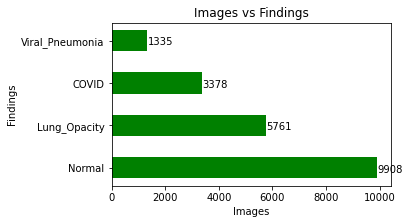

In [ ]:
## Tamaño del dataset (Representación gráfica)
## ==============================================================================

data = {
    'categories': ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'],
    'values': [len(COVID), len(Lung_Opacity), len(Normal), len(Viral_Pneumonia)]
}

data_df = pd.DataFrame(data).sort_values(by='values', ascending=False)

## Declaración de valores para el eje y, en este caso son categorias
eje_x = data_df['categories']
 
## Declaración de valores para el eje x, ahora son los valores
eje_y = data_df['values']
 
## Creación de la Gráfica 
plt.figure(figsize=(5, 3))
plt.barh(y=eje_x, width=eje_y, height=0.5, color='green', align='center')
plt.yticks(fontsize=10)
plt.ylabel('Findings')
plt.xlabel('Images')
plt.title('Images vs Findings')

for i, v in enumerate(eje_y): 
    plt.text(v, i-0.1, str(v),  
            color = 'black')

plt.show()

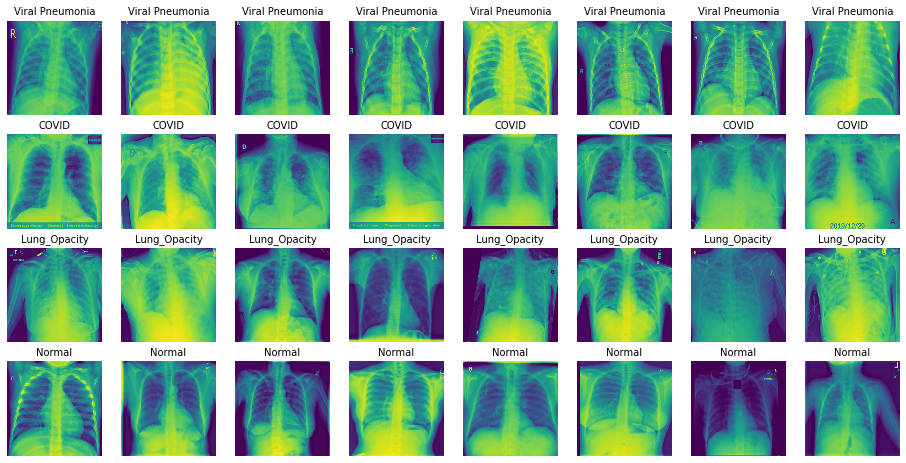

In [ ]:
## VISUALIZACIÓN DE LOS PRIMEROS 50 ELEMENTOS
## =============================================================================

images = [Viral_Pneumonia, COVID, Lung_Opacity, Normal]
images_paths = [Viral_Pneumonia_path, COVID_path, Lung_Opacity_path, Normal_path]

n_rows = 4
n_cols = 8
plt.figure(figsize=(n_cols * 2, n_rows*2))
for row in range(n_rows):
    data = images[row]
    path = images_paths[row]
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        img = cv2.imread(path + data[index]) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img, interpolation="nearest")
        plt.axis('off')
        plt.title(data[index].partition('-')[0], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show();

## 4. UnderSampling (Mejora el desequilibrio del dataset)

In [ ]:
## Reducción del dataset 'Normal' a 6000 imágenes para compensar el efecto de desequilibrio
## ========================================================================================

Normal = np.random.choice(Normal, 6000, False)
Normal

array(['Normal-6453.png', 'Normal-835.png', 'Normal-8162.png', ...,
       'Normal-6880.png', 'Normal-5293.png', 'Normal-8709.png'],
      dtype='<U16')

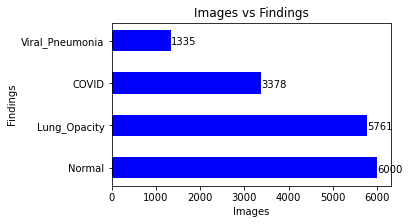

In [ ]:
## Tamaño del dataset (Representación gráfica)
## ==============================================================================

data = {
    'categories': ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'],
    'values': [len(COVID), len(Lung_Opacity), len(Normal), len(Viral_Pneumonia)]
}

data_df = pd.DataFrame(data).sort_values(by='values', ascending=False)

## Declaración de valores para el eje y, en este caso son categorias
eje_x = data_df['categories']
 
## Declaración de valores para el eje x, ahora son los valores
eje_y = data_df['values']
 
## Creación de la Gráfica 
plt.figure(figsize=(5, 3))
plt.barh(y=eje_x, width=eje_y, height=0.5, color='blue', align='center')
plt.yticks(fontsize=10)
plt.ylabel('Findings')
plt.xlabel('Images')
plt.title('Images vs Findings')

for i, v in enumerate(eje_y): 
    plt.text(v, i-0.1, str(v),  
            color = 'black')

plt.show()

In [ ]:
## Tamaño final del dataset 
## ==============================================================================

print(f'Imágens Viral Pneumonia: {len(Viral_Pneumonia)}')
print(f'Imágens COVID: {len(COVID)}')
print(f'Imágens Lung Opacity: {len(Lung_Opacity)}')
print(f'Imágens Normal: {len(Normal)}')

Imágens Viral Pneumonia: 1335
Imágens COVID: 3378
Imágens Lung Opacity: 5761
Imágens Normal: 6000


## 5. Preprocesado de imágenes

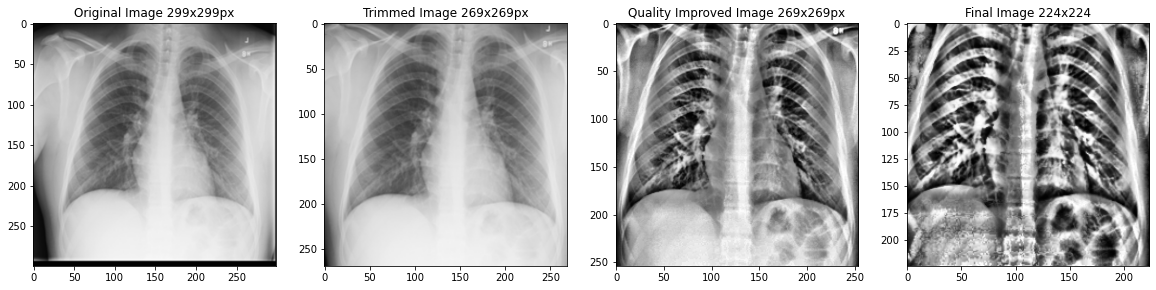

In [ ]:
## Tratamiento de imágenes
## ==============================================================================

plt.figure(figsize=(20, 20))

plt.subplot(141)
img = cv2.imread(os.path.join('images/Normal', 'Normal-1428.png'))
plt.title('Original Image 299x299px')
plt.imshow(img)

plt.subplot(142)
img = img[15:284, 15:284]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(10,10))
#img = clahe.apply(img)
plt.title('Trimmed Image 269x269px')
plt.imshow(img, cmap='gray');

plt.subplot(143)
img = img[15:284, 15:284]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(10,10))
img = clahe.apply(img)
plt.title('Quality Improved Image 269x269px')
plt.imshow(img, cmap='gray');

plt.subplot(144)
img = img[15:284, 15:284]
img = cv2.resize(img, (224, 224))
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(10,10))
img = clahe.apply(img)
plt.title('Final Image 224x224')
plt.imshow(img, cmap='gray');

In [ ]:
## Creación de un nuevo dataset con tamaño 224x224 inlcluyendo mejoras
## ==============================================================================

findings = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

images = {
    'COVID': COVID,
    'Lung_Opacity': Lung_Opacity,
    'Normal': Normal,
    'Viral_Pneumonia': Viral_Pneumonia
}

for f in findings:
    for i in images[f]:
        img = cv2.imread(os.path.join('images/' + f, i))
        img = img[15:284, 15:284]
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
        img = clahe.apply(img) 
        cv2.imwrite('224x224/'+ f + '/' + i, img)

## 6. Preparación del dataset final "data undersampling"

In [ ]:
## División del dataset en train-test 80%/20% 
## ==============================================================================

from sklearn.model_selection import train_test_split

COVID_train, COVID_test = train_test_split(COVID, test_size=0.2, random_state=42)
Lung_Opacity_train, Lung_Opacity_test = train_test_split(Lung_Opacity, test_size=0.2, random_state=42)
Normal_train, Normal_test = train_test_split(Normal, test_size=0.2, random_state=42)
Viral_Pneumonia_train, Viral_Pneumonia_test = train_test_split(Viral_Pneumonia, test_size=0.2, random_state=42)

In [ ]:
## Tamaño del dataset de entrenamiento 
## ==============================================================================

print(f'Imágens Viral Pneumonia: {len(Viral_Pneumonia_train)}')
print(f'Imágens COVID: {len(COVID_train)}')
print(f'Imágens Lung Opacity: {len(Lung_Opacity_train)}')
print(f'Imágens Normal: {len(Normal_train)}')

Imágens Viral Pneumonia: 1068
Imágens COVID: 2702
Imágens Lung Opacity: 4608
Imágens Normal: 4800


In [ ]:
## Tamaño del dataset de prueba
## ==============================================================================

print(f'Imágens Viral Pneumonia: {len(Viral_Pneumonia_test)}')
print(f'Imágens COVID: {len(COVID_test)}')
print(f'Imágens Lung Opacity: {len(Lung_Opacity_test)}')
print(f'Imágens Normal: {len(Normal_test)}')

Imágens Viral Pneumonia: 267
Imágens COVID: 676
Imágens Lung Opacity: 1153
Imágens Normal: 1200


In [ ]:
## Creación de directorios
## ==============================================================================

datasets = ['train', 'test']
findings = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']

for dataset in datasets:
    for finding in findings:
        os.mkdir(f'dataset_undersampling/{dataset}/{finding}')

In [ ]:
## Copia de las imágenes en subdirectorios para su posterior procesado con Keras
## ==============================================================================

import shutil

datasets = [Viral_Pneumonia_train, Viral_Pneumonia_test]
findings = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']


for i in datasets[1]:
    finding = findings[3]
    path = 'dataset_undersampling/' + 'test' + '/' + finding +'/' + i 
    shutil.copy(os.path.join(f'224X224/{finding}/', i ), path)